In [39]:
import umap
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import yaml
from yaml.loader import SafeLoader
import json

In [28]:
test = "cingulate_ACCpatterns_1"
date = "2023-04-18/14-58-37"
dir = "/neurospin/dico/jlaval/Runs/01_deep_supervised/Program/Output/"+date+"/"+test+"_embeddings/"

In [44]:

#print the config and AUC
with open(dir+'../partial_config.yaml') as f:
    config = yaml.load(f, Loader=SafeLoader)
    dataset_name = config['dataset_name']

with open(dir + "values.json") as f:
    AUC = json.load(f)
    AUC = AUC["cross_val_auc"]

print(f'dataset for training : {dataset_name} \ndataset for testing : ' + test + f"\nCross val AUC: ({AUC[0]},{AUC[1]})")

dataset for training : cingulate_HCP_half_2 
dataset for testing : cingulate_ACCpatterns_1
Cross val AUC: (0.5078618954431088,0.0318182847304991)


In [45]:
#load embeddings
embeddings_dir = dir + "cross_val_effective_embeddings.csv"
df_embeddings = pd.read_csv(embeddings_dir, index_col=0)

#load true labels
label_dir = dir + "cross_val_predicted_labels.csv" #NB: predicted_labels first column are actually the true labels
labels = pd.read_csv(label_dir, index_col=0)
labels.sort_index(inplace=True)
labels = labels.label

In [46]:
def compute_umap(df):
    # apply umap
    reducer = umap.UMAP()
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [47]:
umap_embeddings, _ = compute_umap(df_embeddings)

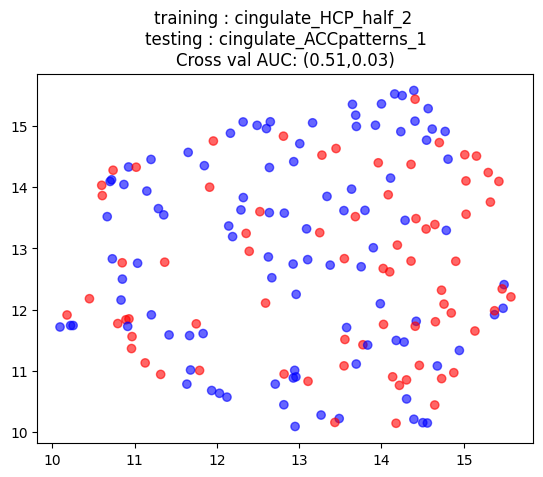

In [49]:
#plot UMAP

plt.close()

cmap = ['b', 'r']
colors = [cmap[i] for i in labels]

plt.scatter(umap_embeddings[:, 0],
            umap_embeddings[:, 1],
            c=colors,
            alpha=0.6)

plt.title(f'training : {dataset_name} \ntesting : ' + test + f"\nCross val AUC: ({AUC[0]:.2f},{AUC[1]:.2f})")
plt.show()